# 4.1 영화 리뷰 분류: 이진 분류 문제(binary classification)

## 4.1.1 IMDB 데이터셋

### 코드 4-1. IMDB 데이터셋 로드하기

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# num_words: 훈련 데이터에서 사용할 단어의 개수(빈도 순), 원본은 88,585개의 고유한 단어가 존재한다.

17464789/17464789 [==============================] - 8s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### 코드 4-2. 리뷰를 다시 텍스트로 디코딩하기

In [6]:
word_index = imdb.get_word_index() # 단어 -> 정수 인덱스로 매핑된 딕셔너리

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스 -> 단어로 매핑되도록 뒤집는다.

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 4.1.2 데이터 준비

### 코드 4-3. 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences) (데이터 개수), dimension)이고 모든 원소가 0인 행렬
    for i, sequence in enumerate(sequences): # 데이터의 인덱스와 데이터 안에 있는 단어 인덱스의 sequence 추출
        for j in sequence: # 데이터 안에 있는 각각의 단어 인덱스 추출
            results[i][j] = 1
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 4.1.3 신경망 모델 만들기

### 코드 4-4. 모델 정의하기

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

### 코드 4-5. 모델 컴파일하기

In [14]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

## 4.1.4 훈련 검증

### 코드 4-6. 검증 세트 준비하기

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 코드 4-7. 모델 훈련하기

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5255 - accuracy: 0.7747 - val_loss: 0.3895 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3152 - accuracy: 0.8980 - val_loss: 0.3084 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2259 - accuracy: 0.9246 - val_loss: 0.3166 - val_accuracy: 0.8736
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1808 - accuracy: 0.9405 - val_loss: 0.2751 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1436 - accuracy: 0.9537 - val_loss: 0.2826 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9637 - val_loss: 0.2961 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0964 - accuracy: 0.9720 - val_loss: 0.3139 - val_accuracy: 0.8849
Epoch 8/20
30

In [17]:
history_dict = history.history

In [18]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 코드 4-8. 훈련과 검증 손실 그리기

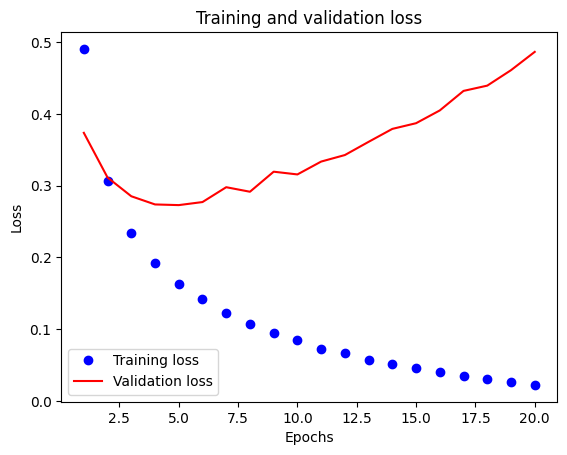

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "r", label = "Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 코드 4-9. 훈련과 검증 정확도 그리기

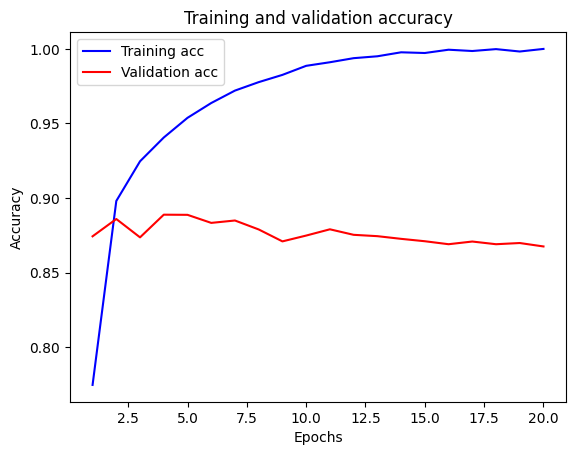

In [21]:
plt.clf() # 그래프 초기화

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "r", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 코드 4-10. 모델을 처음부터 다시 훈련하기

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [23]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [24]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4784 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2744 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2087 - accuracy: 0.9274
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1719 - accuracy: 0.9395


In [25]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.8849


## 4.1.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [26]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.14796261],
       [0.9996344 ],
       [0.8050122 ],
       ...,
       [0.11236499],
       [0.04896521],
       [0.53813255]], dtype=float32)

## 4.1.6 추가 실험

### 표현 층이 1개인 경우

In [44]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [45]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [46]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4908 - accuracy: 0.7915 - val_loss: 0.3738 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3063 - accuracy: 0.9015 - val_loss: 0.3115 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2346 - accuracy: 0.9275 - val_loss: 0.2854 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1922 - accuracy: 0.9408 - val_loss: 0.2739 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1629 - accuracy: 0.9497 - val_loss: 0.2730 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1415 - accuracy: 0.9583 - val_loss: 0.2773 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1223 - accuracy: 0.9653 - val_loss: 0.2980 - val_accuracy: 0.8799
Epoch 8/20
30

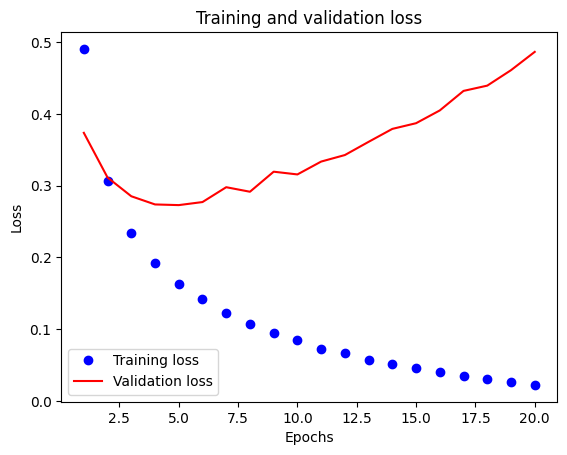

In [50]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "r", label = "Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

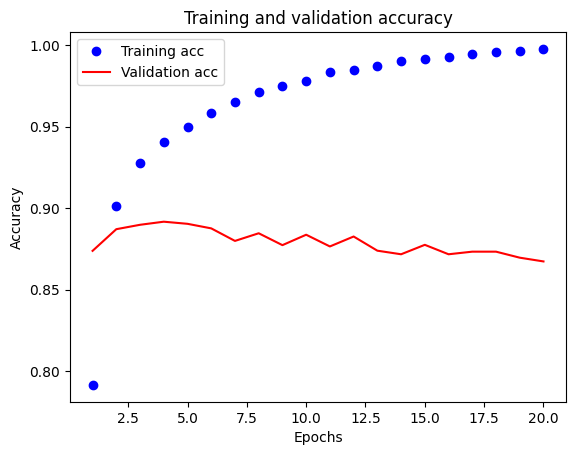

In [51]:
plt.clf() # 그래프 초기화

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "r", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
# 적절한 epoch 횟수는 4회로 판단되므로 다시 모델 학습하기

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [53]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [54]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4352 - accuracy: 0.8328
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2708 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2152 - accuracy: 0.9261
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1827 - accuracy: 0.9372


In [55]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2862 - accuracy: 0.8851


[0.2862327992916107, 0.8851199746131897]

### 표현 층이 3개인 경우

In [56]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [57]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [59]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 24ms/step - loss: 0.5004 - accuracy: 0.7783 - val_loss: 0.3644 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2814 - accuracy: 0.9031 - val_loss: 0.3149 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2050 - accuracy: 0.9295 - val_loss: 0.2897 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1574 - accuracy: 0.9473 - val_loss: 0.3058 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1243 - accuracy: 0.9588 - val_loss: 0.3151 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0995 - accuracy: 0.9671 - val_loss: 0.3219 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0786 - accuracy: 0.9759 - val_loss: 0.3724 - val_accuracy: 0.8737
Epoch 8/20
30

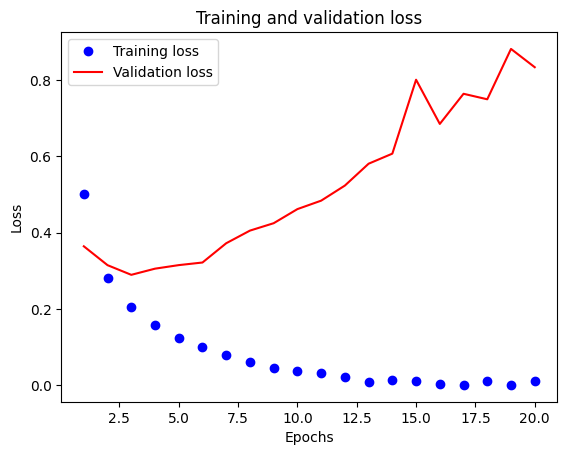

In [60]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "r", label = "Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

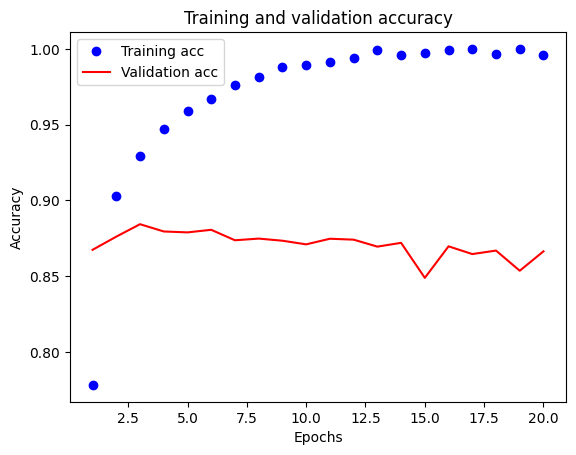

In [61]:
plt.clf() # 그래프 초기화

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "r", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
# 적절한 epoch 횟수는 3회로 판단되므로 다시 모델 학습하기
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [63]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [64]:
model.fit(x_train, y_train, epochs = 3, batch_size = 512)

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.5205 - accuracy: 0.7852
Epoch 2/3
49/49 [==============================] - 0s 9ms/step - loss: 0.2805 - accuracy: 0.9059
Epoch 3/3
49/49 [==============================] - 0s 9ms/step - loss: 0.2061 - accuracy: 0.9277


In [65]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.8876


[0.28202465176582336, 0.8876000046730042]

### 유닛 개수 늘리기

In [75]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [76]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [77]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.4875 - accuracy: 0.7633 - val_loss: 0.3939 - val_accuracy: 0.8309
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2570 - accuracy: 0.9029 - val_loss: 0.2790 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1836 - accuracy: 0.9318 - val_loss: 0.2809 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1407 - accuracy: 0.9500 - val_loss: 0.3071 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0996 - accuracy: 0.9665 - val_loss: 0.3361 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0789 - accuracy: 0.9730 - val_loss: 0.3592 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.4179 - val_accuracy: 0.8769
Epoch 8/20
30

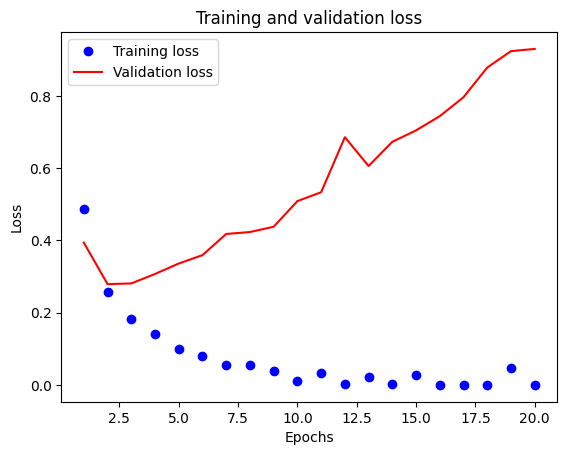

In [78]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "r", label = "Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

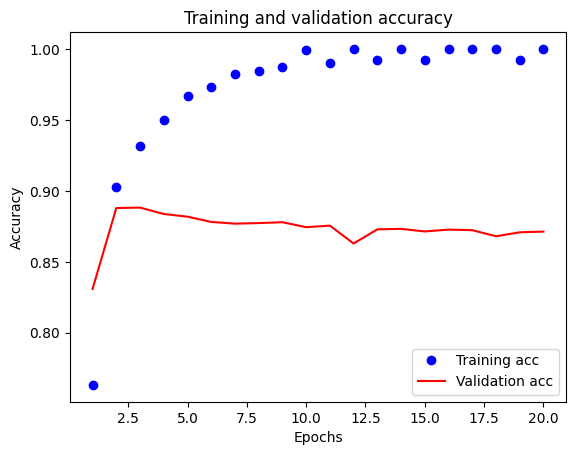

In [79]:
plt.clf() # 그래프 초기화

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "r", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [81]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [82]:
model.fit(x_train, y_train, epochs = 2, batch_size = 512)

Epoch 1/2
49/49 [==============================] - 2s 16ms/step - loss: 0.4293 - accuracy: 0.7994
Epoch 2/2
49/49 [==============================] - 1s 16ms/step - loss: 0.2391 - accuracy: 0.9089


In [83]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2801 - accuracy: 0.8875


[0.28007370233535767, 0.8875200152397156]

# 4.2 뉴스 기사 분류: 다중 분류 문제(multiclass classification)

## 4.2.1 로이터 데이터셋

### 코드 4-11. 로이터 데이터셋 로드하기

In [84]:
from tensorflow.keras.datasets import reuters

In [85]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [86]:
len(train_data)

8982

In [87]:
len(test_data)

2246

In [88]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

### 코드 4-12. 로이터 데이터셋을 텍스트로 디코딩하기

In [89]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [90]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [91]:
train_labels[0]

3

## 4.2.2 데이터 준비

### 코드 4-13. 데이터 인코딩하기

In [130]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### 코드 4-14. 레이블 원-핫 인코딩하기

In [131]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [96]:
# 위 코드와 같은 동작을 수행하는 코드
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4.2.3 모델 구성

### 코드 4-15. 모델 정의하기

In [97]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

### 코드 4-16. 모델 컴파일하기

In [98]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

## 4.2.4 훈련 검증

### 코드 4-17. 검증 세트 준비하기

In [99]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### 코드 4-18. 모델 훈련하기

In [100]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.5341 - accuracy: 0.5172 - val_loss: 1.6925 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3921 - accuracy: 0.7134 - val_loss: 1.2903 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0394 - accuracy: 0.7747 - val_loss: 1.1337 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8169 - accuracy: 0.8249 - val_loss: 1.0369 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6449 - accuracy: 0.8662 - val_loss: 0.9685 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5111 - accuracy: 0.8976 - val_loss: 0.9248 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4134 - accuracy: 0.9139 - val_loss: 0.8923 - val_accuracy: 0.8140
Epoch 8/20
16

### 코드 4-19. 훈련과 검증 손실 그리기

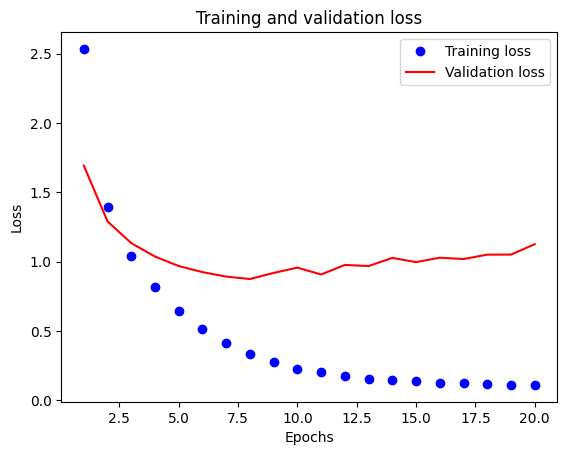

In [101]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 코드 4-20. 훈련과 검증 정확도 그리기

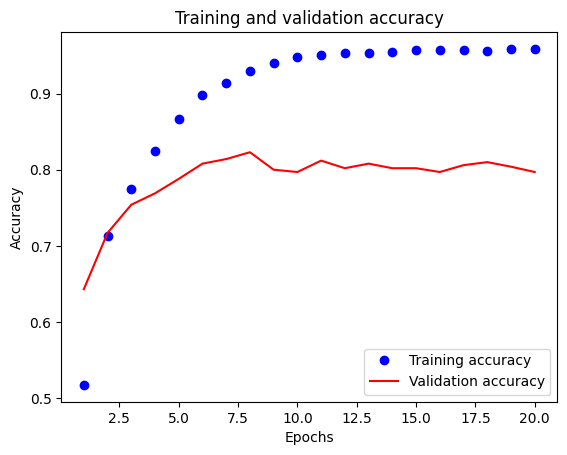

In [102]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 코드 4-21. 모델을 처음부터 다시 훈련하기

In [110]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [111]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [112]:
model.fit(x_train,
          y_train,
          epochs = 8,
          batch_size = 512)

Epoch 1/8
18/18 [==============================] - 1s 17ms/step - loss: 2.5742 - accuracy: 0.5144
Epoch 2/8
18/18 [==============================] - 0s 18ms/step - loss: 1.3923 - accuracy: 0.6971
Epoch 3/8
18/18 [==============================] - 0s 17ms/step - loss: 1.0254 - accuracy: 0.7840
Epoch 4/8
18/18 [==============================] - 0s 17ms/step - loss: 0.8014 - accuracy: 0.8326
Epoch 5/8
18/18 [==============================] - 0s 17ms/step - loss: 0.6376 - accuracy: 0.8662
Epoch 6/8
18/18 [==============================] - 0s 16ms/step - loss: 0.5051 - accuracy: 0.8962
Epoch 7/8
18/18 [==============================] - 0s 17ms/step - loss: 0.4057 - accuracy: 0.9139
Epoch 8/8
18/18 [==============================] - 0s 18ms/step - loss: 0.3312 - accuracy: 0.9316


In [113]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9277 - accuracy: 0.8001


In [114]:
# 랜덤한 분류기 사용 시 정확도
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()

0.188780053428317

## 4.2.5 새로운 데이터에 대해 예측하기

In [115]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [116]:
predictions[0].shape

(46,)

In [117]:
np.sum(predictions[0])

0.9999998

In [118]:
np.argmax(predictions[0])

3

## 4.2.6 레이블과 손실을 다루는 방법

In [119]:
# label이 범주형 인코딩되지 않고 정수형이다.
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [120]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [121]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [122]:
model.fit(x_train, y_train, epochs = 8, batch_size = 512)

Epoch 1/8
18/18 [==============================] - 1s 20ms/step - loss: 2.5253 - accuracy: 0.5081
Epoch 2/8
18/18 [==============================] - 0s 18ms/step - loss: 1.3427 - accuracy: 0.7144
Epoch 3/8
18/18 [==============================] - 0s 17ms/step - loss: 0.9987 - accuracy: 0.7880
Epoch 4/8
18/18 [==============================] - 0s 18ms/step - loss: 0.7832 - accuracy: 0.8348
Epoch 5/8
18/18 [==============================] - 0s 17ms/step - loss: 0.6225 - accuracy: 0.8695
Epoch 6/8
18/18 [==============================] - 0s 17ms/step - loss: 0.4916 - accuracy: 0.8960
Epoch 7/8
18/18 [==============================] - 0s 19ms/step - loss: 0.3972 - accuracy: 0.9145
Epoch 8/8
18/18 [==============================] - 0s 19ms/step - loss: 0.3224 - accuracy: 0.9310


In [123]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.7983


[0.925823450088501, 0.7983080744743347]

## 4.2.7 충분히 큰 중간층을 두어야 하는 이유

### 코드 4-22. 정보 병목이 있는 모델

In [132]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [133]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [134]:
model.fit(partial_x_train, partial_y_train, epochs = 8, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/8
63/63 [==============================] - 2s 14ms/step - loss: 2.5840 - accuracy: 0.3608 - val_loss: 1.8620 - val_accuracy: 0.5750
Epoch 2/8
63/63 [==============================] - 1s 9ms/step - loss: 1.5821 - accuracy: 0.6154 - val_loss: 1.4938 - val_accuracy: 0.6170
Epoch 3/8
63/63 [==============================] - 1s 10ms/step - loss: 1.2749 - accuracy: 0.6681 - val_loss: 1.3714 - val_accuracy: 0.6580
Epoch 4/8
63/63 [==============================] - 1s 10ms/step - loss: 1.1066 - accuracy: 0.7001 - val_loss: 1.3085 - val_accuracy: 0.6640
Epoch 5/8
63/63 [==============================] - 1s 9ms/step - loss: 0.9857 - accuracy: 0.7270 - val_loss: 1.2923 - val_accuracy: 0.6780
Epoch 6/8
63/63 [==============================] - 1s 10ms/step - loss: 0.8920 - accuracy: 0.7538 - val_loss: 1.2683 - val_accuracy: 0.6980
Epoch 7/8
63/63 [==============================] - 1s 10ms/step - loss: 0.8125 - accuracy: 0.7816 - val_loss: 1.2685 - val_accuracy: 0.7060
Epoch 8/8
63/63 [=====

## 4.2.8 추가 실험

### 더 큰 층을 사용하는 경우

In [135]:
model = keras.Sequential([
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [136]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [137]:
model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 1.5992 - accuracy: 0.6522 - val_loss: 1.1627 - val_accuracy: 0.7390
Epoch 2/20
63/63 [==============================] - 1s 23ms/step - loss: 0.7435 - accuracy: 0.8388 - val_loss: 1.0039 - val_accuracy: 0.7900
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 0.4267 - accuracy: 0.9085 - val_loss: 0.9070 - val_accuracy: 0.8150
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 0.2821 - accuracy: 0.9362 - val_loss: 1.0272 - val_accuracy: 0.8070
Epoch 5/20
63/63 [==============================] - 1s 24ms/step - loss: 0.2174 - accuracy: 0.9475 - val_loss: 1.0904 - val_accuracy: 0.8000
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 0.1817 - accuracy: 0.9530 - val_loss: 1.0654 - val_accuracy: 0.7980
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.1619 - accuracy: 0.9533 - val_loss: 1.0603 - val_accuracy: 0.7960
Epoch 8/20
63

### 더 다양한 조건 시도해 보기

In [138]:
model = keras.Sequential([
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [139]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [140]:
model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 29ms/step - loss: 1.4902 - accuracy: 0.6574 - val_loss: 1.1132 - val_accuracy: 0.7330
Epoch 2/20
63/63 [==============================] - 2s 26ms/step - loss: 0.7114 - accuracy: 0.8371 - val_loss: 1.0348 - val_accuracy: 0.7550
Epoch 3/20
63/63 [==============================] - 2s 27ms/step - loss: 0.3889 - accuracy: 0.9122 - val_loss: 0.8984 - val_accuracy: 0.8060
Epoch 4/20
63/63 [==============================] - 2s 28ms/step - loss: 0.2509 - accuracy: 0.9411 - val_loss: 0.9551 - val_accuracy: 0.8110
Epoch 5/20
63/63 [==============================] - 2s 29ms/step - loss: 0.1922 - accuracy: 0.9500 - val_loss: 1.0285 - val_accuracy: 0.7940
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.1561 - accuracy: 0.9531 - val_loss: 1.1464 - val_accuracy: 0.8110
Epoch 7/20
63/63 [==============================] - 2s 27ms/step - loss: 0.1368 - accuracy: 0.9539 - val_loss: 1.1990 - val_accuracy: 0.8100
Epoch 8/20
63

In [141]:
model = keras.Sequential([
    layers.Dense(1024, activation = "relu"),
    layers.Dense(1024, activation = "relu"),
    layers.Dense(1024, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [142]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [143]:
model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 7s 103ms/step - loss: 1.5301 - accuracy: 0.6470 - val_loss: 1.1095 - val_accuracy: 0.7360
Epoch 2/20
63/63 [==============================] - 7s 104ms/step - loss: 0.7259 - accuracy: 0.8300 - val_loss: 1.1478 - val_accuracy: 0.7530
Epoch 3/20
63/63 [==============================] - 7s 103ms/step - loss: 0.3964 - accuracy: 0.9040 - val_loss: 1.0664 - val_accuracy: 0.7980
Epoch 4/20
63/63 [==============================] - 6s 99ms/step - loss: 0.2441 - accuracy: 0.9379 - val_loss: 1.2000 - val_accuracy: 0.7990
Epoch 5/20
63/63 [==============================] - 6s 100ms/step - loss: 0.2025 - accuracy: 0.9445 - val_loss: 1.3975 - val_accuracy: 0.8040
Epoch 6/20
63/63 [==============================] - 6s 99ms/step - loss: 0.1480 - accuracy: 0.9505 - val_loss: 1.7119 - val_accuracy: 0.8160
Epoch 7/20
63/63 [==============================] - 6s 98ms/step - loss: 0.1243 - accuracy: 0.9553 - val_loss: 1.8039 - val_accuracy: 0.8120
Epoch 8/2

# 4.3 주택 가격 예측: 회귀 문제(regression)

## 4.3.1 보스턴 주택 가격 데이터셋

### 코드 4-23. 보스턴 주택 데이터셋 로드하기

In [144]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 1us/step


In [145]:
train_data.shape

(404, 13)

In [146]:
test_data.shape

(102, 13)

In [147]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 4.3.2 데이터 준비

### 코드 4-24. 데이터 정규화하기

In [148]:
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

## 4.3.3 모델 구성

### 코드 4-25. 모델 정의하기

In [149]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    return model

## 4.3.4 K-fold 교차 검증을 사용한 훈련 검증

### 코드 4-26. K-fold 교차 검증하기

In [150]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}th fold is being processed")
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # k번째 검증 데이터 준비
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # k번째 타깃 데이터 준비
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]], axis = 0)
    
    model = build_model() # 케라스 모델 구성(컴파일 포함)
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 16, verbose = 0) # 모델 훈련(verbose)이 0이므로 훈련 과정이 출력되지 않는다.
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    
    all_scores.append(val_mae)

#0th fold is being processed
#1th fold is being processed
#2th fold is being processed
#3th fold is being processed


In [151]:
all_scores

[1.9080930948257446, 2.5523300170898438, 2.64223313331604, 2.428863763809204]

In [152]:
np.mean(all_scores)

2.382880002260208

### 코드 4-27. 각 폴드의 검증 점수 저장하기

In [155]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"#{i}th fold is being processed")
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]], axis = 0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 16, validation_data = (val_data, val_targets), verbose = 0)
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0th fold is being processed
#1th fold is being processed
#2th fold is being processed
#3th fold is being processed


### 코드 4-28. K-fold 교차 검증 점수 평균 기록하기

In [156]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

### 코드 4-29. 검증 점수 그래프 그리기

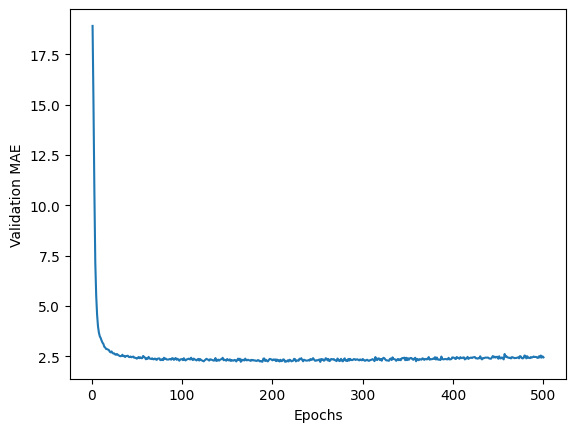

In [157]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### 코드 4-30. 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기

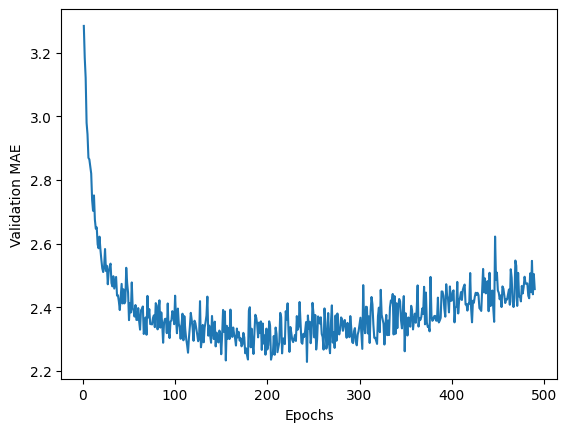

In [158]:
truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### 코드 4-31. 최종 모델 훈련하기

In [159]:
model = build_model()
model.fit(train_data, train_targets, epochs = 130, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 0s/step - loss: 16.0156 - mae: 2.5345


In [160]:
test_mae_score

2.534463405609131

## 4.3.5 새로운 데이터에 대해 예측하기

In [161]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


In [162]:
predictions[0]

array([8.08242], dtype=float32)